In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [51]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the Data Frame:
    poly_frame = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_frame['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly_frame[name] = poly_frame['power_1'].apply(lambda x: x**power)
    return poly_frame

In [6]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pd.read_csv('data/kc_house_data.csv', dtype=dtype_dict )

In [10]:
sales = sales.sort_values(['sqft_living','price'])

In [100]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)


In [101]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(poly1_data, sales['price'])

In [102]:
model1.coef_

array([280.6235679])

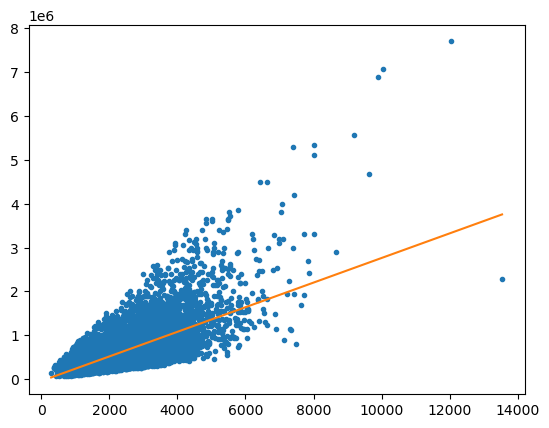

In [104]:
%matplotlib inline
plt.plot(poly1_data[['power_1']],sales['price'],'.',poly1_data[['power_1']], model1.predict(poly1_data[['power_1']]),'-')

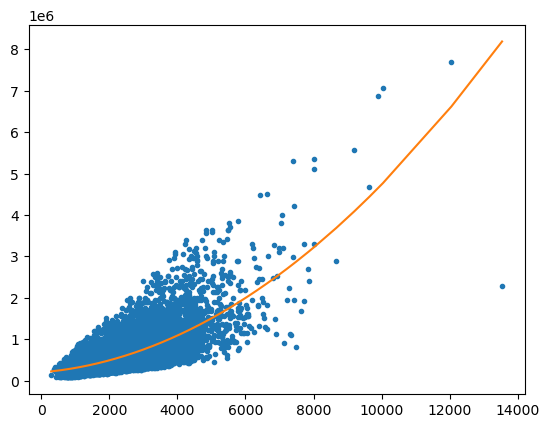

In [105]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
model2 = LinearRegression().fit(poly2_data, sales['price'])
plt.plot(poly2_data[['power_1']],sales['price'],'.',poly1_data[['power_1']], model2.predict(poly2_data),'-')

In [106]:
model2.coef_

array([6.79940947e+01, 3.85812609e-02])

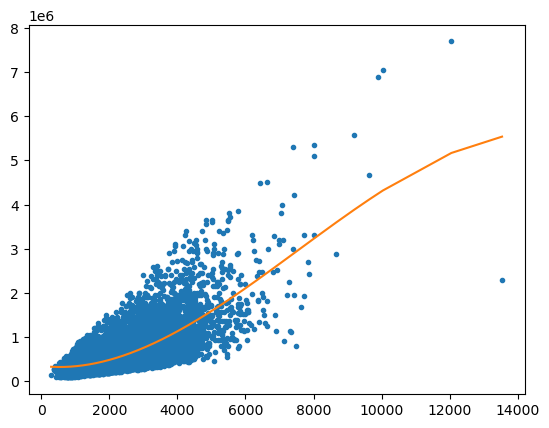

In [107]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
model3 = LinearRegression().fit(poly3_data, sales['price'])
plt.plot(poly3_data[['power_1']],sales['price'],'.',poly3_data[['power_1']], model3.predict(poly3_data),'-')

In [108]:
model3.coef_

array([-9.01819864e+01,  8.70465089e-02, -3.84055260e-06])

# 15th polynomial

In [109]:
set_1 = pd.read_csv('./data/wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('./data/wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('./data/wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('./data/wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [119]:
print("size of set_1 is", len(set_1))
print("size of set_2 is", len(set_2))
print("size of set_3 is", len(set_3))
print("size of set_4 is", len(set_4))

size of set_1 is 5404
size of set_2 is 5398
size of set_3 is 5409
size of set_4 is 5402


In [110]:
poly15_set1 = polynomial_sframe(set_1['sqft_living'], 15)
poly15_set2 = polynomial_sframe(set_2['sqft_living'], 15)
poly15_set3 = polynomial_sframe(set_3['sqft_living'], 15)
poly15_set4 = polynomial_sframe(set_4['sqft_living'], 15)


In [126]:
poly15_set1

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
0,430.0,184900.0,7.950700e+07,3.418801e+10,1.470084e+13,6.321363e+15,2.718186e+18,1.168820e+21,5.025926e+23,2.161148e+26,9.292937e+28,3.995963e+31,1.718264e+34,7.388536e+36,3.177070e+39
1,460.0,211600.0,9.733600e+07,4.477456e+10,2.059630e+13,9.474297e+15,4.358177e+18,2.004761e+21,9.221902e+23,4.242075e+26,1.951354e+29,8.976230e+31,4.129066e+34,1.899370e+37,8.737103e+39
2,470.0,220900.0,1.038230e+08,4.879681e+10,2.293450e+13,1.077922e+16,5.066231e+18,2.381129e+21,1.119130e+24,5.259913e+26,2.472159e+29,1.161915e+32,5.461000e+34,2.566670e+37,1.206335e+40
3,490.0,240100.0,1.176490e+08,5.764801e+10,2.824752e+13,1.384129e+16,6.782231e+18,3.323293e+21,1.628414e+24,7.979227e+26,3.909821e+29,1.915812e+32,9.387480e+34,4.599865e+37,2.253934e+40
4,500.0,250000.0,1.250000e+08,6.250000e+10,3.125000e+13,1.562500e+16,7.812500e+18,3.906250e+21,1.953125e+24,9.765625e+26,4.882812e+29,2.441406e+32,1.220703e+35,6.103516e+37,3.051758e+40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,8000.0,64000000.0,5.120000e+11,4.096000e+15,3.276800e+19,2.621440e+23,2.097152e+27,1.677722e+31,1.342177e+35,1.073742e+39,8.589935e+42,6.871948e+46,5.497558e+50,4.398047e+54,3.518437e+58
5400,8010.0,64160100.0,5.139224e+11,4.116518e+15,3.297331e+19,2.641162e+23,2.115571e+27,1.694572e+31,1.357352e+35,1.087239e+39,8.708787e+42,6.975739e+46,5.587567e+50,4.475641e+54,3.584988e+58
5401,8670.0,75168900.0,6.517144e+11,5.650364e+15,4.898865e+19,4.247316e+23,3.682423e+27,3.192661e+31,2.768037e+35,2.399888e+39,2.080703e+43,1.803969e+47,1.564041e+51,1.356024e+55,1.175673e+59
5402,12050.0,145202500.0,1.749690e+12,2.108377e+16,2.540594e+20,3.061416e+24,3.689006e+28,4.445252e+32,5.356529e+36,6.454617e+40,7.777813e+44,9.372265e+48,1.129358e+53,1.360876e+57,1.639856e+61


In [111]:
model15_set1 = LinearRegression().fit(poly15_set1, set_1['price'])
model15_set2 = LinearRegression().fit(poly15_set2, set_2['price'])
model15_set3 = LinearRegression().fit(poly15_set3, set_3['price'])
model15_set4 = LinearRegression().fit(poly15_set4, set_4['price'])

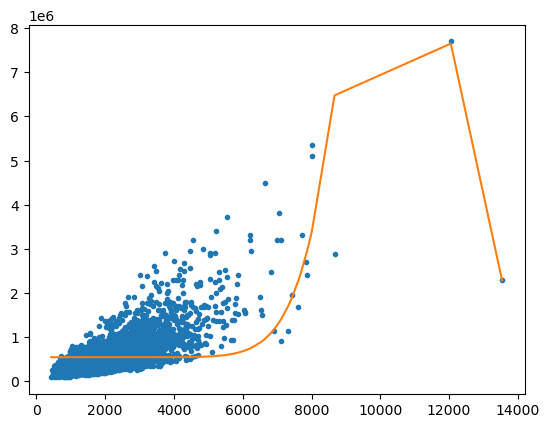

In [112]:
plt.plot(poly15_set1[['power_1']],set_1['price'],'.', poly15_set1[['power_1']], model15_set1.predict(poly15_set1),'-')

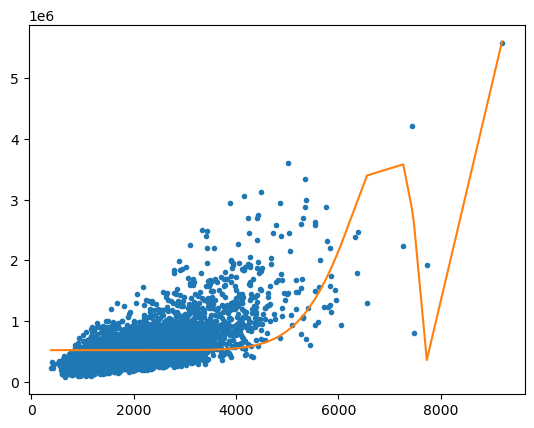

In [64]:
plt.plot(poly15_set2[['power_1']],set_2['price'],'.', poly15_set2[['power_1']], model15_set2.predict(poly15_set2),'-')

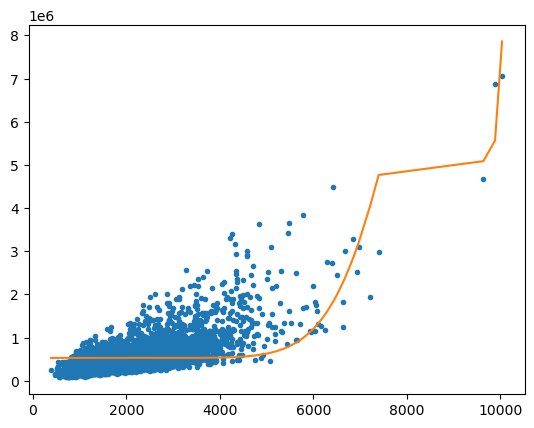

In [113]:
plt.plot(poly15_set3[['power_1']],set_3['price'],'.', poly15_set3[['power_1']], model15_set3.predict(poly15_set3),'-')

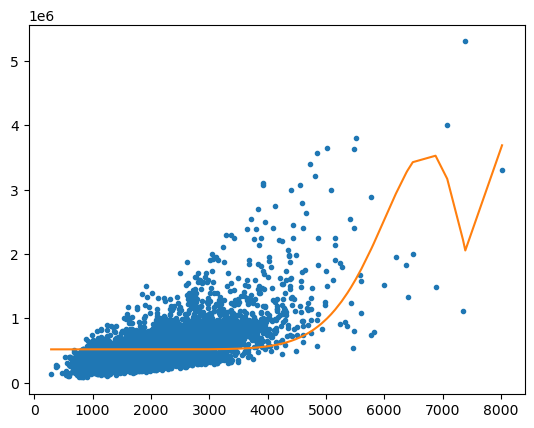

In [66]:
plt.plot(poly15_set4[['power_1']],set_4['price'],'.', poly15_set4[['power_1']], model15_set4.predict(poly15_set4),'-')

In [114]:
print('Set 1 - 15th coeff:', model15_set1.coef_[-1])
print('Set 2 - 15th coeff:', model15_set2.coef_[-1])
print('Set 3 - 15th coeff:', model15_set3.coef_[-1])
print('Set 4 - 15th coeff:', model15_set4.coef_[-1])

Set 1 - 15th coeff: 2.1864111655557764e-52
Set 2 - 15th coeff: 2.2927113480296896e-50
Set 3 - 15th coeff: 3.431329320576343e-51
Set 4 - 15th coeff: 5.021993112614861e-50


# Validation - Training - Test set

In [115]:
train_set = pd.read_csv('data/wk3_kc_house_train_data.csv', dtype=dtype_dict)
valid_set = pd.read_csv('data/wk3_kc_house_valid_data.csv', dtype=dtype_dict)
test_set = pd.read_csv('data/wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [116]:
RSS = {}
for degree in range(1,16):
    poly_data = polynomial_sframe(train_set['sqft_living'], degree)
    model = LinearRegression().fit(poly_data, train_set['price'])
    poly_data_valid = polynomial_sframe(valid_set['sqft_living'], degree)
    RSS_value = np.sum((valid_set['price']-model.predict(poly_data_valid))**2)
    RSS.update({str(degree): "{:.2E}".format(RSS_value)})

In [117]:
RSS

{'1': '6.29E+14',
 '2': '6.24E+14',
 '3': '6.26E+14',
 '4': '6.28E+14',
 '5': '7.00E+14',
 '6': '1.13E+15',
 '7': '2.77E+15',
 '8': '6.81E+15',
 '9': '1.53E+16',
 '10': '3.55E+16',
 '11': '9.15E+16',
 '12': '2.58E+17',
 '13': '7.62E+17',
 '14': '2.30E+18',
 '15': '6.96E+18'}

In [125]:
poly_data = polynomial_sframe(train_set['sqft_living'], 2)
model = LinearRegression().fit(poly_data, train_set['price'])
poly_data_test = polynomial_sframe(test_set['sqft_living'], 2)
predictions = model.predict(poly_data_test)
residuals = test_set['price'] - predictions
RSS = residuals**2
RSS = RSS.sum()
print("{:.2E}".format(RSS))

1.36E+14


In [127]:
model.coef_

array([1.22673842, 0.0522949 ])